In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/7 [===>..........................] - ETA: 2s - loss: 2.2738 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 1s 35ms/step - loss: 2.2684 - accuracy: 0.0906 - val_loss: 2.1793 - val_accuracy: 0.1186
Epoch 2/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.1918 - accuracy: 0.1562
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 2.2123 - accuracy: 0.1291 - val_loss: 2.1256 - val_accuracy: 0.1424
Epoch 3/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.2217 - accuracy: 0.0859
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 2.1770 - accuracy: 0.1200 - val_loss: 2.0790 - val_accuracy: 0.1797
Epoch 4/1000
1/7 [===>..........................] - ETA: 0s - loss: 2.2076 - accuracy: 0.0781
Epoch 4: savin

7/7 [==============================] - 0s 9ms/step - loss: 1.3952 - accuracy: 0.4677 - val_loss: 1.2327 - val_accuracy: 0.5492
Epoch 29/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.3968 - accuracy: 0.4844
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.3818 - accuracy: 0.4779 - val_loss: 1.2003 - val_accuracy: 0.5525
Epoch 30/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.2672 - accuracy: 0.5312
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.3302 - accuracy: 0.4972 - val_loss: 1.1702 - val_accuracy: 0.5627
Epoch 31/1000
1/7 [===>..........................] - ETA: 0s - loss: 1.2950 - accuracy: 0.5703
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 1.3075 - accuracy: 0.5085 - val_loss: 1.1398

Epoch 56/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9631 - accuracy: 0.6094
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.9135 - accuracy: 0.6546 - val_loss: 0.6506 - val_accuracy: 0.9051
Epoch 57/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9281 - accuracy: 0.6797
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.9374 - accuracy: 0.6308 - val_loss: 0.6408 - val_accuracy: 0.9017
Epoch 58/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.8404 - accuracy: 0.6484
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.8730 - accuracy: 0.6761 - val_loss: 0.6326 - val_accuracy: 0.9085
Epoch 59/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.9360 - accuracy: 0.6250
Epoch 59

7/7 [==============================] - 0s 9ms/step - loss: 0.7463 - accuracy: 0.7146 - val_loss: 0.4622 - val_accuracy: 0.9119
Epoch 84/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7364 - accuracy: 0.7344
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.7310 - accuracy: 0.7180 - val_loss: 0.4583 - val_accuracy: 0.9186
Epoch 85/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.7500
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.7576 - accuracy: 0.7169 - val_loss: 0.4535 - val_accuracy: 0.9119
Epoch 86/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7370 - accuracy: 0.7344
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.7353 - accuracy: 0.7271 - val_loss: 0.4509

Epoch 111/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7734
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.7486 - val_loss: 0.3764 - val_accuracy: 0.9322
Epoch 112/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6610 - accuracy: 0.7500
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.7429 - val_loss: 0.3725 - val_accuracy: 0.9390
Epoch 113/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7018 - accuracy: 0.7109
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6579 - accuracy: 0.7565 - val_loss: 0.3699 - val_accuracy: 0.9356
Epoch 114/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6196 - accuracy: 0.7891
E

1/7 [===>..........................] - ETA: 0s - loss: 0.5666 - accuracy: 0.7656
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.6097 - accuracy: 0.7565 - val_loss: 0.3356 - val_accuracy: 0.9458
Epoch 139/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7891
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6040 - accuracy: 0.7724 - val_loss: 0.3339 - val_accuracy: 0.9424
Epoch 140/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.8203
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.6042 - accuracy: 0.7826 - val_loss: 0.3305 - val_accuracy: 0.9492
Epoch 141/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7500
Epoch 141: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.5916 - accuracy: 0.7344
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5877 - accuracy: 0.7758 - val_loss: 0.3068 - val_accuracy: 0.9492
Epoch 166/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.6043 - accuracy: 0.7422
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5591 - accuracy: 0.7860 - val_loss: 0.3072 - val_accuracy: 0.9492
Epoch 167/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.8125
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5989 - accuracy: 0.7735 - val_loss: 0.3053 - val_accuracy: 0.9593
Epoch 168/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7166 - accuracy: 0.7109
Epoch 168: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7891
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5724 - accuracy: 0.7939 - val_loss: 0.2931 - val_accuracy: 0.9559
Epoch 193/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.7651 - accuracy: 0.7578
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5498 - accuracy: 0.8075 - val_loss: 0.2912 - val_accuracy: 0.9593
Epoch 194/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.8203
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5254 - accuracy: 0.8063 - val_loss: 0.2892 - val_accuracy: 0.9593
Epoch 195/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.8203
Epoch 195: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4716 - accuracy: 0.8203
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5310 - accuracy: 0.7950 - val_loss: 0.2831 - val_accuracy: 0.9593
Epoch 220/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7422
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5231 - accuracy: 0.8052 - val_loss: 0.2799 - val_accuracy: 0.9627
Epoch 221/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.8203
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5643 - accuracy: 0.7961 - val_loss: 0.2784 - val_accuracy: 0.9627
Epoch 222/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5883 - accuracy: 0.7891
Epoch 222: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7969
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.7916 - val_loss: 0.2601 - val_accuracy: 0.9695
Epoch 247/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.9141
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5423 - accuracy: 0.8177 - val_loss: 0.2621 - val_accuracy: 0.9661
Epoch 248/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7422
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5131 - accuracy: 0.8052 - val_loss: 0.2653 - val_accuracy: 0.9695
Epoch 249/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.7891
Epoch 249: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.8359
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4763 - accuracy: 0.8188 - val_loss: 0.2577 - val_accuracy: 0.9627
Epoch 274/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.7734
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.8177 - val_loss: 0.2566 - val_accuracy: 0.9627
Epoch 275/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.8281
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5247 - accuracy: 0.8075 - val_loss: 0.2559 - val_accuracy: 0.9627
Epoch 276/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.7734
Epoch 276: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.8359
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5280 - accuracy: 0.8018 - val_loss: 0.2529 - val_accuracy: 0.9695
Epoch 301/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.8359
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4773 - accuracy: 0.8301 - val_loss: 0.2550 - val_accuracy: 0.9695
Epoch 302/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5506 - accuracy: 0.8203
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4868 - accuracy: 0.8245 - val_loss: 0.2548 - val_accuracy: 0.9695
Epoch 303/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7734
Epoch 303: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.8203
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4510 - accuracy: 0.8313 - val_loss: 0.2473 - val_accuracy: 0.9695
Epoch 328/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8438
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4882 - accuracy: 0.8177 - val_loss: 0.2463 - val_accuracy: 0.9695
Epoch 329/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4939 - accuracy: 0.8047
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5148 - accuracy: 0.7984 - val_loss: 0.2447 - val_accuracy: 0.9695
Epoch 330/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.8203
Epoch 330: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.8672
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4564 - accuracy: 0.8324 - val_loss: 0.2324 - val_accuracy: 0.9729
Epoch 355/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4137 - accuracy: 0.8594
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.5042 - accuracy: 0.8188 - val_loss: 0.2346 - val_accuracy: 0.9729
Epoch 356/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4284 - accuracy: 0.8516
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4780 - accuracy: 0.8347 - val_loss: 0.2360 - val_accuracy: 0.9729
Epoch 357/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8516
Epoch 357: savin

1/7 [===>..........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.8281
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 8ms/step - loss: 0.4526 - accuracy: 0.8313 - val_loss: 0.2265 - val_accuracy: 0.9729
Epoch 382/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.8594
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4393 - accuracy: 0.8403 - val_loss: 0.2263 - val_accuracy: 0.9695
Epoch 383/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4896 - accuracy: 0.8281
Epoch 383: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
7/7 [==============================] - 0s 9ms/step - loss: 0.4596 - accuracy: 0.8369 - val_loss: 0.2276 - val_accuracy: 0.9695
Epoch 384/1000
1/7 [===>..........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8281
Epoch 384: savin

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9729


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.4318336e-01 1.5794187e-06 1.0601198e-04 2.9872141e-03 3.7751443e-06
 3.7231963e-02 1.2493904e-02 4.2530341e-04 3.5668034e-03]
0


# 混同行列

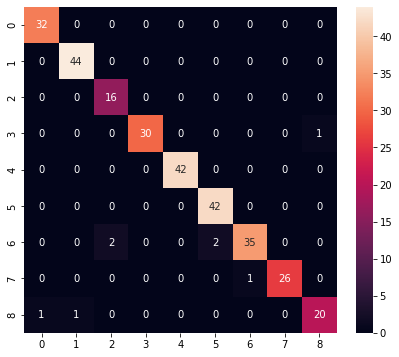

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.98      1.00      0.99        44
           2       0.89      1.00      0.94        16
           3       1.00      0.97      0.98        31
           4       1.00      1.00      1.00        42
           5       0.95      1.00      0.98        42
           6       0.97      0.90      0.93        39
           7       1.00      0.96      0.98        27
           8       0.95      0.91      0.93        22

    accuracy                           0.97       295
   macro avg       0.97      0.97      0.97       295
weighted avg       0.97      0.97      0.97       295



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Gabriel\AppData\Local\Temp\tmpwlgxohhb\assets


6640

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.43183362e-01 1.57941849e-06 1.06011976e-04 2.98721087e-03
 3.77514402e-06 3.72319631e-02 1.24939084e-02 4.25303791e-04
 3.56680341e-03]
0
